In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

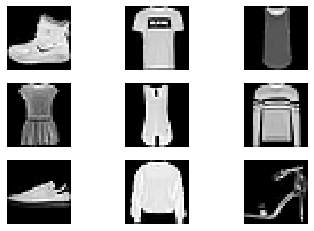

In [3]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k],cmap="gray")
    plt.axis('off')
plt.show()

In [4]:
y_train_full[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [5]:
#Pre-processing - to double and scaled and splitting to training and validation
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [6]:
from functools import partial

my_dense_layers = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))


model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layers(500),
    my_dense_layers(250),
    my_dense_layers(10, activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optmizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
             metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 37s 677us/sample - loss: 0.5709 - accuracy: 0.8144 - val_loss: 0.4916 - val_accuracy: 0.8410
Epoch 2/10
55000/55000 [==============================] - 38s 694us/sample - loss: 0.4473 - accuracy: 0.8567 - val_loss: 0.4706 - val_accuracy: 0.8570
Epoch 3/10
55000/55000 [==============================] - 36s 657us/sample - loss: 0.4197 - accuracy: 0.8665 - val_loss: 0.4208 - val_accuracy: 0.8732
Epoch 4/10
55000/55000 [==============================] - 34s 627us/sample - loss: 0.4032 - accuracy: 0.8729 - val_loss: 0.4180 - val_accuracy: 0.8630
Epoch 5/10
55000/55000 [==============================] - 34s 627us/sample - loss: 0.3951 - accuracy: 0.8761 - val_loss: 0.4127 - val_accuracy: 0.8724
Epoch 6/10
55000/55000 [==============================] - 37s 668us/sample - loss: 0.3868 - accuracy: 0.8781 - val_loss: 0.4059 - val_accuracy: 0.8740
Epoch 7/10
55000/55000 [=====================

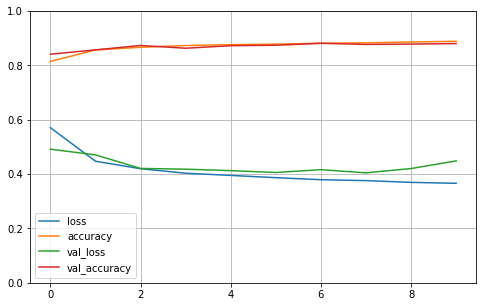

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)

[[4760    0   73   51   19    0  636    0    4    0]
 [  16 5273   49   56   22    0   28    0    0    0]
 [  34    0 4542   36  580    0  304    0    0    0]
 [ 208   11   39 4856  270    0  115    0    0    0]
 [   2    1  322   96 4864    0  226    0    1    0]
 [   0    0    0    0    0 5439    1   57    1    9]
 [ 581    2  523   68  441    0 3891    0    1    0]
 [   0    0    0    0    0  108    0 5347    1   32]
 [  21    1   64   13  135   10  324    9 4933    0]
 [   0    1    0    0    2   56    1  434    1 4999]]


In [10]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.46934525821208956, 0.8659]

In [11]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[851   8  14  11   6   0  98   0  12   0]
 [  1 982   0  12   2   0   1   0   2   0]
 [ 17   3 803   9 108   0  55   0   4   1]
 [ 34  44   8 844  39   1  27   0   3   0]
 [  1   2  94  35 830   0  37   0   1   0]
 [  0   1   0   0   0 969   0  13   0  17]
 [164   5 114  24  99   2 569   0  23   0]
 [  0   0   0   0   0  72   0 902   0  26]
 [  3   4   2   5   8  10   5   5 958   0]
 [  0   0   0   0   0   7   1  41   0 951]]


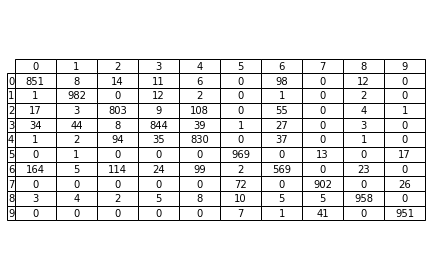

In [12]:
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('NN_conf_mat.pdf')